# Machine Learning - Decision Tress - Random Forest - XGBoost

In [1]:
# Packages/ libraries
import os #provides functions for interacting wth the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increase the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


# Machine Learning Process

1. Problem formulation
2. Gather the raw data
3. Data preprocessing
4. Split the raw data
5. Select and train models
6. Model evaluation
7. Parameter tuning
8. Test final model

## 1. Problem formulation.

### we want to predict if a customer is going to churn or not

In [3]:
# loading the data
raw_data = pd.read_csv('churn raw data.csv', encoding='latin-1')

In [4]:
# shape of df and first 5 row
print(raw_data.shape)
raw_data.head()

(10000, 14)


RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [5]:
# check all elements for each feature
for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values <12:
        print('The number of values for feature {} : {} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} : {}'.format(column, nr_values))
    

The number of values for feature RowNumber : 10000
The number of values for feature CustomerId : 10000
The number of values for feature Surname : 2932
The number of values for feature CreditScore : 460
The number of values for feature Geography : 3 -- ['France' 'Germany' 'Spain']
The number of values for feature Gender : 2 -- ['Female' 'Male']
The number of values for feature Age : 70
The number of values for feature Tenure : 11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Balance : 6382
The number of values for feature NumOfProducts : 4 -- [1 2 3 4]
The number of values for feature HasCrCard : 2 -- [0 1]
The number of values for feature IsActiveMember : 2 -- [0 1]
The number of values for feature EstimatedSalary : 9999
The number of values for feature Exited : 2 -- [0 1]


In [6]:
# checking for null values
raw_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
raw_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

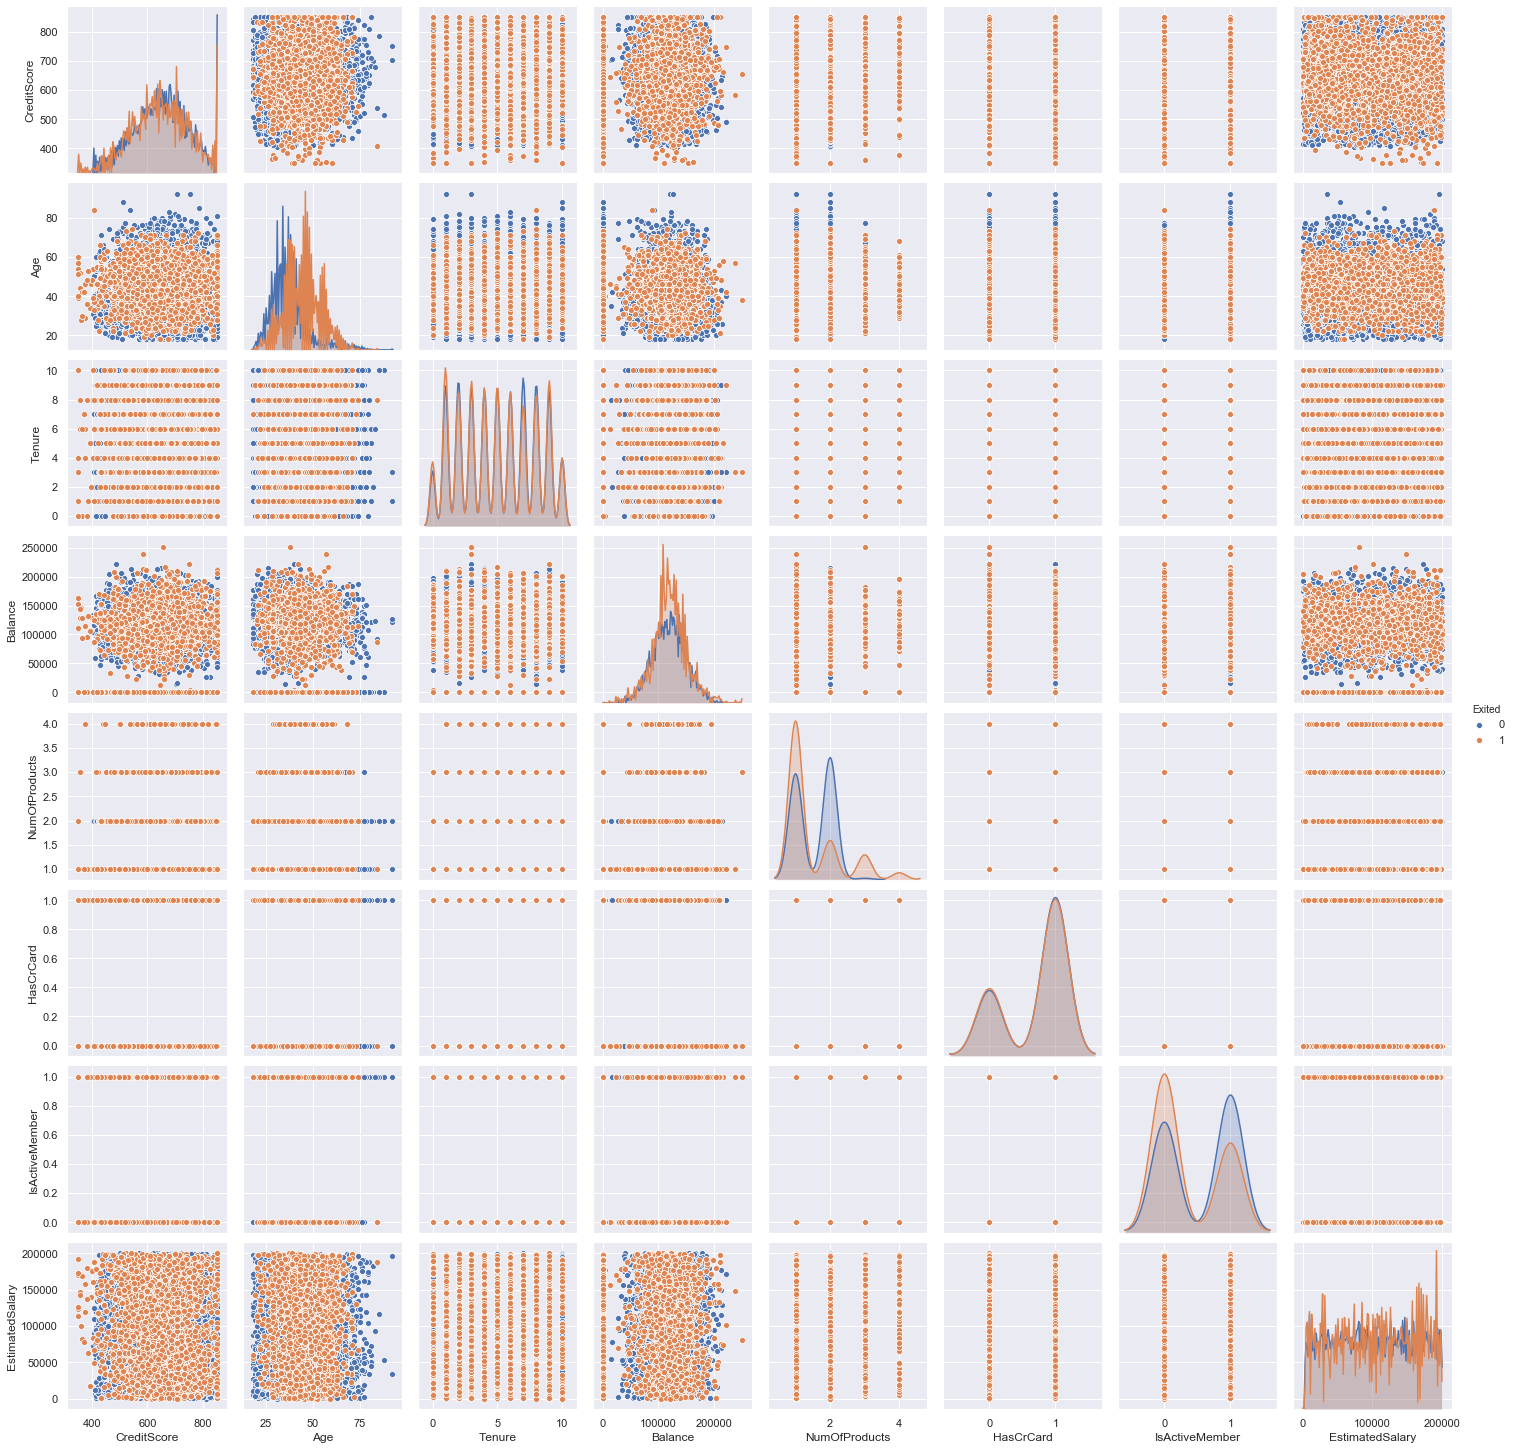

In [8]:
# Limit data to only numerical columns
raw_data2 = raw_data[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

# visualize the data using seaborn Pairplots
graph = sns.pairplot(raw_data2, hue = 'Exited', diag_kws={'bw':0.2})

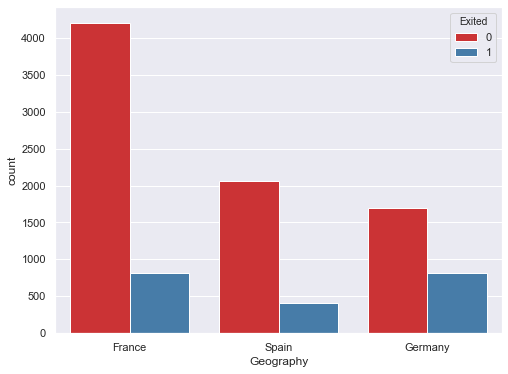

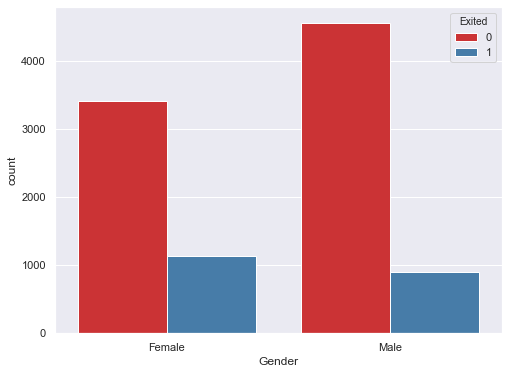

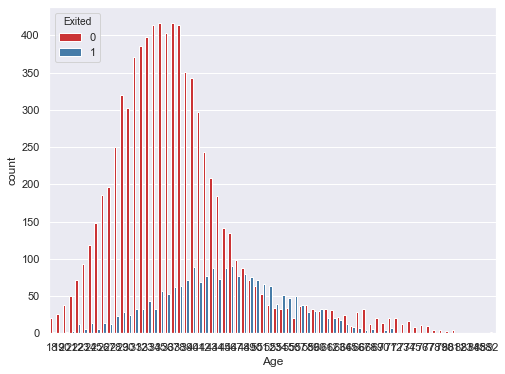

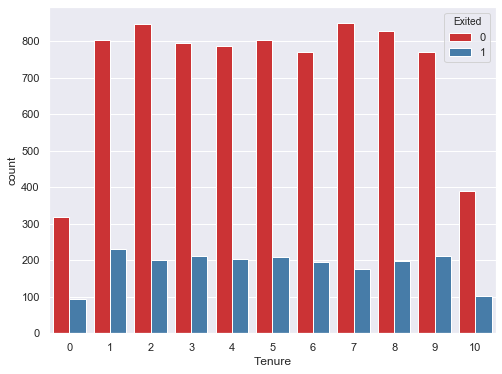

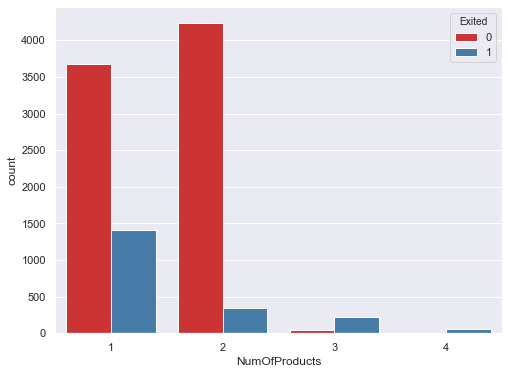

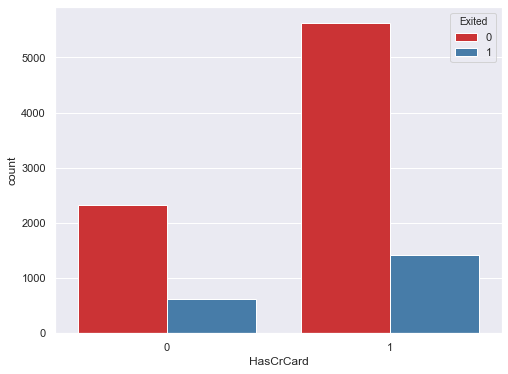

In [9]:
# Investigate non numeric features
features = ['Geography','Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard']

for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data=raw_data2, hue = 'Exited', palette="Set1")

In [16]:
# Make categorial features into numeric representation

new_raw_data = pd.get_dummies(raw_data2, columns =['Geography', "Gender", "HasCrCard", "IsActiveMember"])
new_raw_data.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  EstimatedSalary  \
0          619   42       2       0.00              1        101348.88   
1          608   41       1   83807.86              1        112542.58   
2          502   42       8  159660.80              3        113931.57   
3          699   39       1       0.00              2         93826.63   
4          850   43       2  125510.82              1         79084.10   

   Exited  Geography_France  Geography_Germany  Geography_Spain  \
0       1                 1                  0                0   
1       0                 0                  0                1   
2       1                 1                  0                0   
3       0                 1                  0                0   
4       0                 0                  0                1   

   Gender_Female  Gender_Male  HasCrCard_0  HasCrCard_1  IsActiveMember_0  \
0              1            0            0            1                 0   
1              1            0            1            0                 0   
2              1            0            0            1                 1   
3              1            0            1            0                 1   
4              1            0            0            1                 0   

   IsActiveMember_1  
0                 1  
1                 1  
2                 0  
3                 0  
4                 1

In [17]:
# Scale the columns
scaled_vars = ['CreditScore', "EstimatedSalary", "Balance", "Age"]
scaler = MinMaxScaler()
new_raw_data[scaled_vars] = scaler.fit_transform(new_raw_data[scaled_vars])

In [18]:
new_raw_data.head(10)

CreditScore       Age  Tenure   Balance  NumOfProducts  EstimatedSalary  \
0        0.538  0.324324       2  0.000000              1         0.506735   
1        0.516  0.310811       1  0.334031              1         0.562709   
2        0.304  0.324324       8  0.636357              3         0.569654   
3        0.698  0.283784       1  0.000000              2         0.469120   
4        1.000  0.337838       2  0.500246              1         0.395400   
5        0.590  0.351351       8  0.453394              2         0.748797   
6        0.944  0.432432       7  0.000000              2         0.050261   
7        0.052  0.148649       4  0.458540              4         0.596733   
8        0.302  0.351351       4  0.566170              2         0.374680   
9        0.668  0.121622       2  0.536488              1         0.358605   

   Exited  Geography_France  Geography_Germany  Geography_Spain  \
0       1                 1                  0                0   
1       0                 0                  0                1   
2       1                 1                  0                0   
3       0                 1                  0                0   
4       0                 0                  0                1   
5       1                 0                  0                1   
6       0                 1                  0                0   
7       1                 0                  1                0   
8       0                 1                  0                0   
9       0                 1                  0                0   

   Gender_Female  Gender_Male  HasCrCard_0  HasCrCard_1  IsActiveMember_0  \
0              1            0            0            1                 0   
1              1            0            1            0                 0   
2              1            0            0            1                 1   
3              1            0            1            0                 1   
4              1            0            0            1                 0   
5              0            1            0            1                 1   
6              0            1            0            1                 0   
7              1            0            0            1                 1   
8              0            1            1            0                 0   
9              0            1            0            1                 0   

   IsActiveMember_1  
0                 1  
1                 1  
2                 0  
3                 0  
4                 1  
5                 0  
6                 1  
7                 0  
8                 1  
9                 1

## 4. Split the raw data - Hold-out validation

In [19]:
X = new_raw_data.drop('Exited', axis=1).values # Input features (attributes)
y = new_raw_data['Exited'].values # target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size = 0.1, random_state=0)

X shape: (10000, 15)
y shape: (10000,)


## 5. Running Decision Tree

- How decision trees work: Desicion trees are a supervised learning method used for classification and regression
- The ID3 algorithm begins with the original set{S}, S as the root node.
- On each iteration of the algorithm, it iterates through every unused attribute of the set and claculates the entropy( or information gain) of that attribute.
- It then selects the attribute with the smallest entropy(or largest information gain) value.
- The set is then split by the selected attribute to produce subsets of the data.
- The algorithm continues to recurse on each subset, considering only attributes that aren't already selected.